# Description

## Context

  - AllLife Bank is making plans for the next financial year. They have picked credit card customer base as theie main focus, as the Marketing team has adviced that credit card penetration can be improved upon. 
  - According to the Markieting research, the bank customers percieve its support services poorly. 
  - A personalised marketing campaign has been proposed to achieve the said improved penetration. 
  - The Operations team also wants an upgrade to their service delivery model to ensure timely resolution of customer queries.
  - To achieve the aforementioned, the Heads of Marketing and Delivery have both reached out to the Data Science team for help.


## Objective
  To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


## Data Dictionay
  - Sl_No: Primary key of the records
  - Customer Key: Customer identification number
  - Average Credit Limit: Average credit limit of each customer for all credit cards
  - Total credit cards: Total number of credit cards possessed by the customer
  - Total visits bank: Total number of visits that customer made (yearly) personally to the bank
  - Total visits online: Total number of visits or online logins made by the customer (yearly)
  - Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#setting pandas to display maximum number of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

#Library to scale the dataset
from sklearn.preprocessing import StandardScaler

#Library for computing distance
from scipy.spatial.distance import cdist

#Library to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

#Library to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
#loading the dataframe using pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Files/Clustering Project/Credit+Card+Customer+Data.csv')

In [3]:
#checking the basic information about the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
#Checking the shape of the dataframe
df.shape

(660, 7)

- The data consists of 660 rows, which signifies 660 customers, described with 7 attributes
- The data does not seem to have any missing values, but this would be further confirmed
- The data also appears to consist of the integer data type all through

In [5]:
#Checking for missing value
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There indeed apears to be no missing values

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
#Taking a closer look at 10 random entries from the data
df.sample(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
160,161,52758,7000,1,0,3,10
61,62,36929,18000,1,2,2,9
216,217,54477,11000,3,1,5,4
203,204,56624,9000,2,0,3,7
477,478,62649,51000,7,5,2,4
74,75,33187,7000,2,0,5,8
410,411,45808,40000,5,2,2,2
109,110,41634,18000,4,2,3,8
55,56,68419,6000,1,2,2,4
50,51,51182,13000,1,0,5,9


In [8]:
#Computing the basic statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


- From above, it can be deduced that the average customer visits the bank phisically twice in a year
- The average customer also only log into their online banking platform twice in a year
- Average number of credit cards hel by a customer is 5

In [9]:
df['Customer Key'].value_counts()

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64

In [10]:
#Creating a datafram for the features to be considered
df_feat = df.drop(['Customer Key', 'Sl_No'], axis=1)

In [11]:
df_feat.sample(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
342,9000,6,4,2,3
365,13000,7,5,0,2
125,14000,2,1,5,5
559,41000,7,5,2,3
508,59000,7,2,0,3


# Explorative Data Analysis

In [12]:
!cp /content/drive/MyDrive/Colab\ Files/utils.py /content

In [13]:
import utils
from utils import labeled_barplots

In [14]:
#creating an instance for the name of the columns in the dataframe
df_cols = df_feat.columns.tolist()
df_cols

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

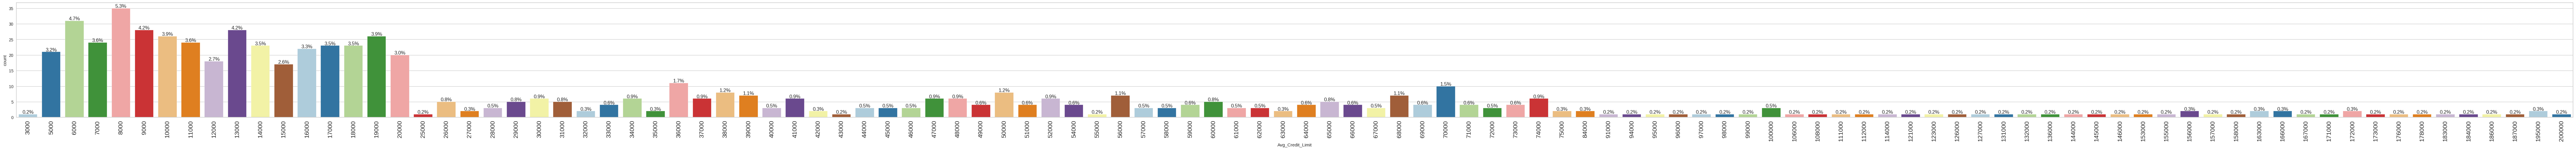

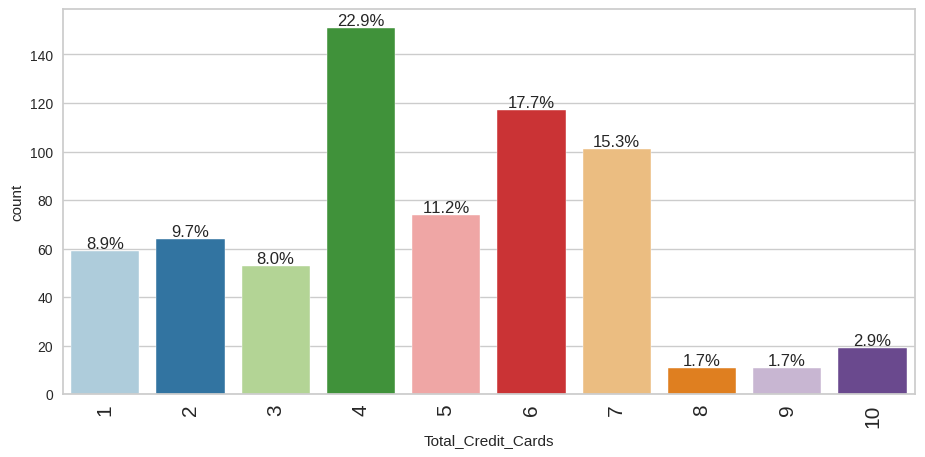

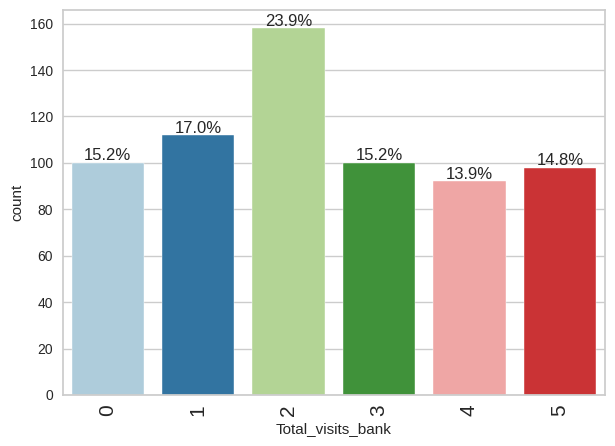

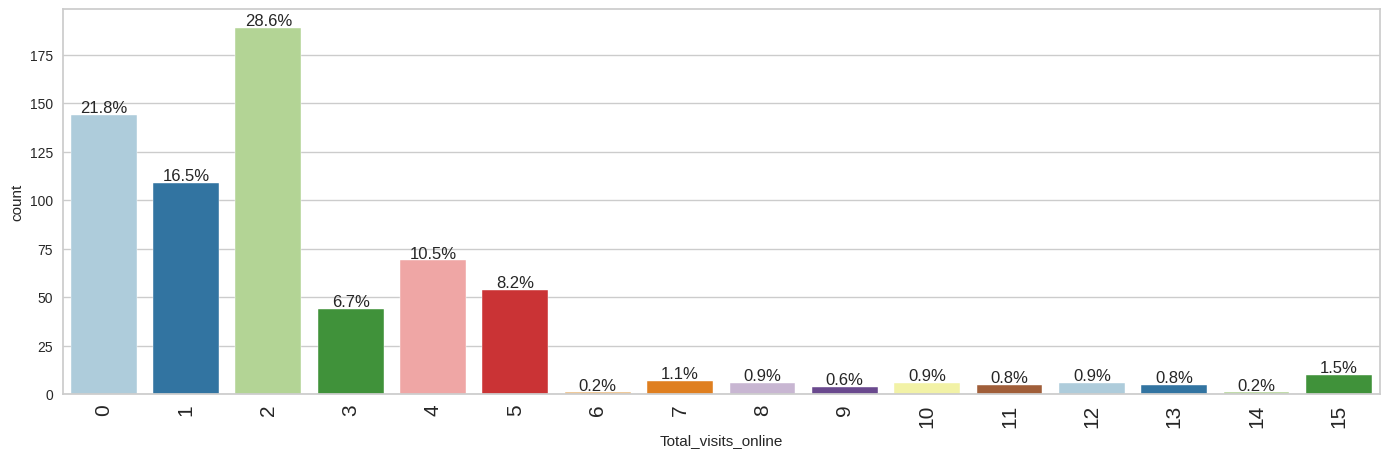

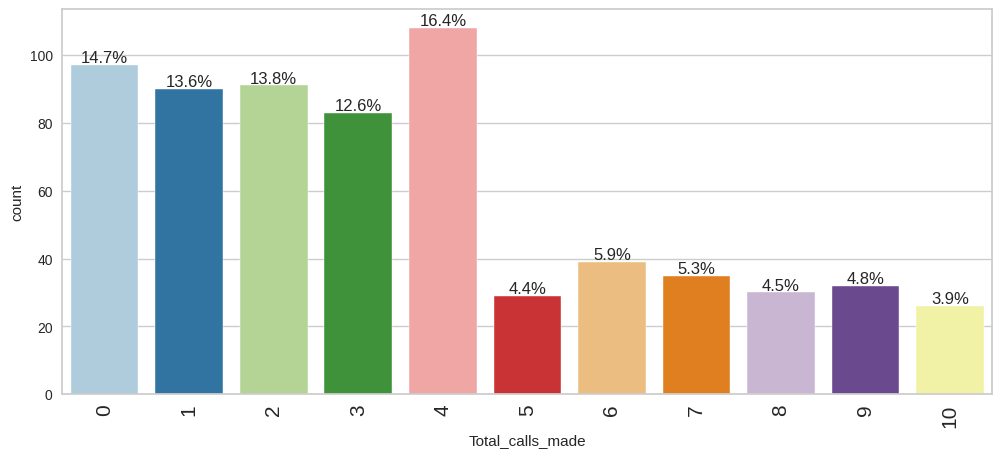

In [15]:
for col in df_feat:
  labeled_barplots(data = df, feature = col, perc = True)

- 91% of the bank customers have more than one credit cards. 23% have 4 cards, while 18% have as many as 6 credit cards
- 15% of the bank's customers do not visit the bank at all in a year, and 15% also visits as much as 5 times in a year
- 22 % of the bank customers do not make use of online banking
- As many as 85% of the bank customers call customer care in the course of the year. This is indication that the bank indeed needts to put its focus on improved service delivery

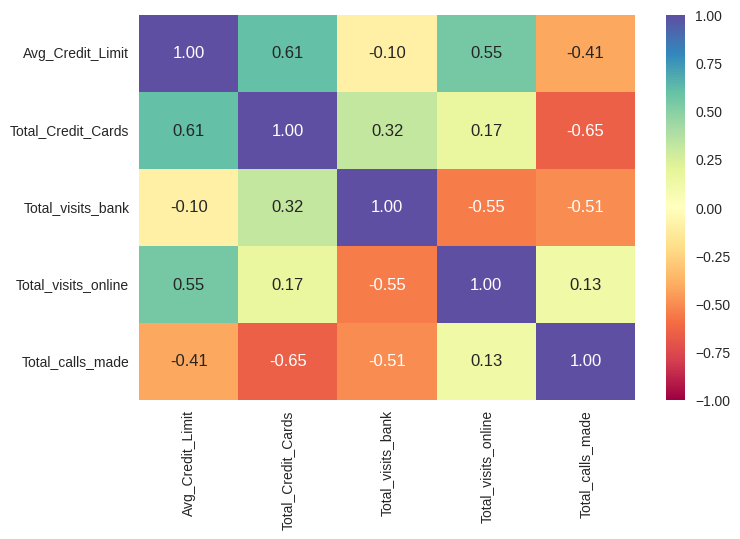

In [16]:
cor = df_feat.corr()
plt.figure(figsize =( 8, 5))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = "Spectral", annot = True, fmt = ".2f")
plt.show()

#### Observation
- An inverse correlation can be seen between total online customer visit and physical visits
- Total credit cards held is strongly and directly correlated to average credit limit, while it has a strong inverse correlation to total calls made.

## Applying K-Means Clustering

In [17]:
#Scaling the data to bring the features withing the same range

scaler = StandardScaler()

df_feat_sd = scaler.fit_transform(df_feat)

Number of Clusters: 1 	verage Distortion: 2.006922226250361
Number of Clusters: 2 	verage Distortion: 1.4571553548514269
Number of Clusters: 3 	verage Distortion: 1.1466276549150365
Number of Clusters: 4 	verage Distortion: 1.0463825294774465
Number of Clusters: 5 	verage Distortion: 0.9908683849620168
Number of Clusters: 6 	verage Distortion: 0.9429882588535909
Number of Clusters: 7 	verage Distortion: 0.9235835095260193
Number of Clusters: 8 	verage Distortion: 0.890065596173837


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

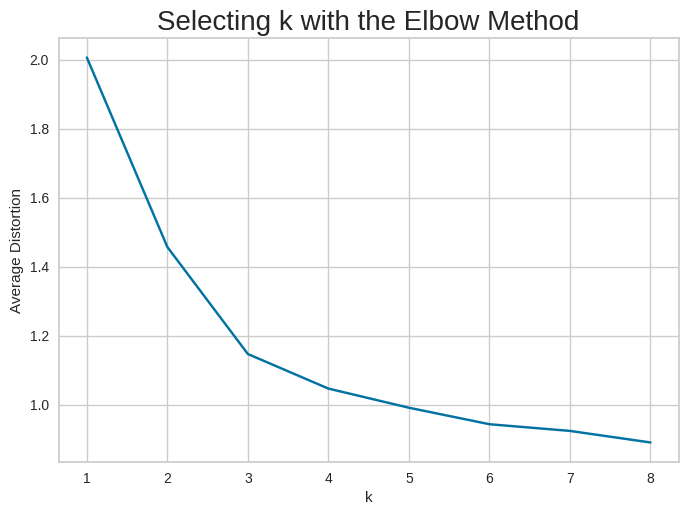

In [18]:
# Determining the optimum number of clusters to use for the kmeans using the average distortion

clusters = range(1, 9)
#creating an empty list for distortions
meanDistortions = []

for k in clusters:
  model = KMeans(n_clusters=k, n_init=10) #Initialising KMeans
  model.fit(df_feat_sd) #Fitting KMeans on the data
  prediction = model.predict(df_feat_sd) #Predicting the model on the data
  distortion = (sum(np.min(cdist(df_feat_sd, model.cluster_centers_, 'euclidean'),
                           axis=1))/df_feat_sd.shape[0])#Finding distortions
  meanDistortions.append(distortion) #Appending distortion values to the empty distortion list created
  print('Number of Clusters:', k, '\tverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize = 20)

- From the elbow of the curve above, it can be seen that the optimal number of cluster is between 2 and 3 clusters. Models would therefore be built with these two figures, and their silhouette scores used to determine which os best

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726898791817692
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.24913950543017654
For n_clusters = 8, silhouette score is 0.22678936953873444
For n_clusters = 9, silhouette score is 0.21807690792084375
For n_clusters = 10, silhouette score is 0.20832711051327737


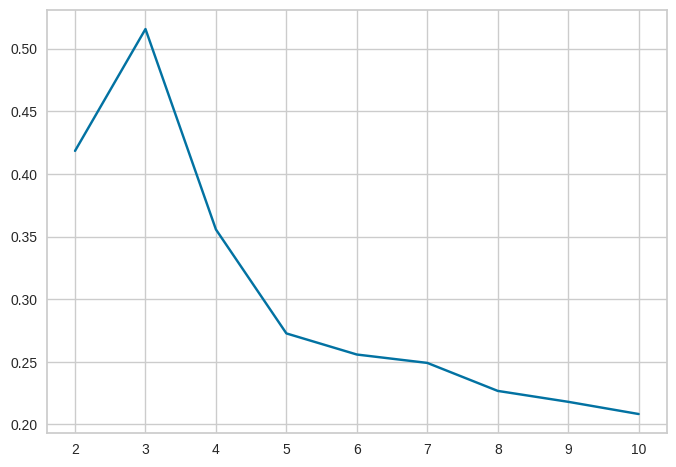

In [19]:
#Computing the silhouette scores for different number of clusters to confirm the optimum number of clusters
from yellowbrick.contrib.wrapper import clusterer
sil_score = [] #Crfeating an empty list for silhouette scores
cluster_list = list(range(2,11)) # Creating a list from range 2 to 10
for n_clusters in cluster_list:
  clusterer = KMeans(n_clusters=n_clusters, n_init=10) #initialising KMeans algorithm
  preds = clusterer.fit_predict((df_feat_sd))#Making predictions on the data
  score = silhouette_score(df_feat_sd, preds)#Computing silhouette scores
  sil_score.append(score) #Appending the silhouette scores to the empty list earlier created
  print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

plt.plot(cluster_list, sil_score)

-From above, it can clearly be seen that 3 is the optimum number of clusters

### Applying kmeans clustering for k = 3

In [20]:
kmeans2 = KMeans(n_clusters=3, random_state = 0, n_init = 10)
kmeans2.fit(df_feat_sd)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [21]:
kmeans2.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
#adding kmeans cluster labels to the original dataframe
df_feat['Kmeans_clusters'] = kmeans2.labels_

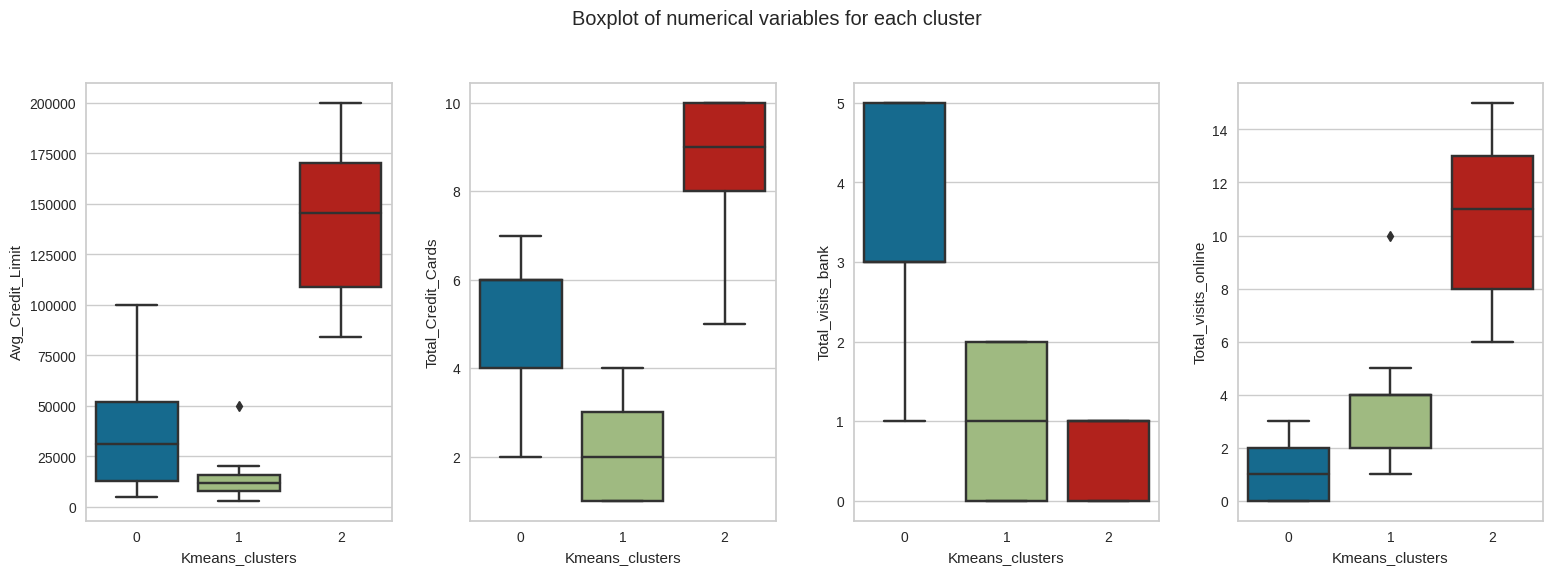

In [23]:
fig, axes = plt.subplots(1, 4, figsize = (16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(4):
  sns.boxplot(ax=axes[ii], y = df_feat[df_cols[counter]], x = df_feat['Kmeans_clusters'])
  counter = counter + 1

fig.tight_layout(pad = 2.0)


## KMeans Clustering Summary

### KMeans Cluster 0

  - Customers in cluster 0 had the least average credit limits.
  - They had average total number of credit cards between 4 and 6
  - They make the most frequent visits to the banking hall
  - They rarely use online banking
  
### KMeans Cluster 1
  - Customers in this cluster had the lowest average credit limits.
  - They mostly had between 1 and 3 credit cards.
  - They visit the bank not more than twice in a year
  - Most if them use online banking between 2 and 4 times in a year


### KMeans Cluster 2
  - Customer in the cluster had the highest credit limit of between 80,000 and 200,000.
  - They hold between 5 and 10 credit cards, with majority having between 8 and 10
  - They do not visit the banking hall more than once in a year
  -They are very active on the online platform of the bank, making between 6 and 15 visits in a year

## Applying DBSCAN

In [24]:
#creating an instance of DBSCAN
dbscan = DBSCAN()

# fitting and predicting the labels

db_labels = dbscan.fit_predict(df_feat_sd)

In [25]:
#Checking the predicted labels
np.unique(db_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23])

- The above has used the default eps of 0.5 as the maximum distance for two points to be considered to be in the same cluster, and a minpts of 5 as the minimum number of points required to form a cluster, and has resulted in grouping the data ito 24 groups, and 1 outlier group

#### Computing the optimal values of eps and minPts

In [26]:
#importing itertools to iterate through the dataframe, trying out various values of eps and minPts
import itertools

In [27]:
#trying out different values of eps and minPts using the product methodf from itertools

eps = np.linspace(0.1, 1, 10)
minPts = np.arange(2, 10)

In [28]:
#creating a tuple of eps and minPts using product method from intertools
hyper_list = list(itertools.product(eps, minPts))

for (eps, minPts) in hyper_list:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(df_feat_sd)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        score = silhouette_score(df_feat_sd, labels)
        print(f"eps: {eps}; minPts: {minPts}; num_labels: {len(unique_labels)}; score: {score}")

eps: 0.1; minPts: 2; num_labels: 59; score: -0.3792847005046285
eps: 0.1; minPts: 3; num_labels: 6; score: -0.4538623399170749
eps: 0.1; minPts: 4; num_labels: 3; score: -0.21755863126572988
eps: 0.2; minPts: 2; num_labels: 89; score: -0.24134194807651826
eps: 0.2; minPts: 3; num_labels: 20; score: -0.47374460800956625
eps: 0.2; minPts: 4; num_labels: 7; score: -0.39937304928535683
eps: 0.30000000000000004; minPts: 2; num_labels: 111; score: -0.18272359988415532
eps: 0.30000000000000004; minPts: 3; num_labels: 29; score: -0.4491418233307505
eps: 0.30000000000000004; minPts: 4; num_labels: 8; score: -0.4237471778396673
eps: 0.4; minPts: 2; num_labels: 115; score: 0.032916960495707005
eps: 0.4; minPts: 3; num_labels: 70; score: -0.06358916972505173
eps: 0.4; minPts: 4; num_labels: 45; score: -0.18198171811681166
eps: 0.4; minPts: 5; num_labels: 26; score: -0.3025802261994537
eps: 0.4; minPts: 6; num_labels: 12; score: -0.378803463122143
eps: 0.4; minPts: 7; num_labels: 7; score: -0.38229

- From the above values, the peake silhouette score seems to have been obtained at an esp of 1.0 and a minPts of 5. The model would therefore be rebuilt using these values

In [29]:
# Rebuilding the DBSCAN model using eps of 1.0 and minPts of 5
dbscan2 = DBSCAN(eps = 1.0, min_samples = 5)

db_labels2 = dbscan2.fit_predict(df_feat_sd)

In [30]:
np.unique(db_labels2)

array([-1,  0,  1])

In [31]:
#adding dbscan cluster labels to the original dataframe

df_feat['db_clusters'] = db_labels2

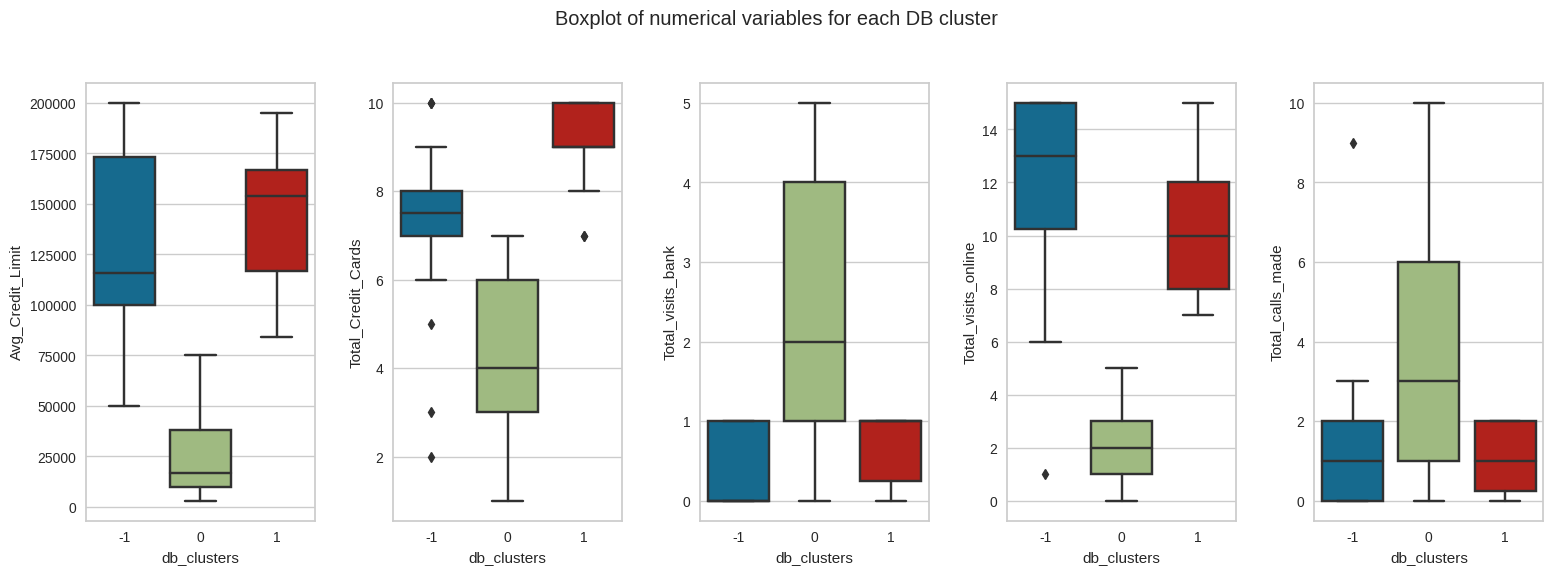

In [32]:
#Creating boxplots to show the variables of the different clusters
fig, axes = plt.subplots(1, 5, figsize = (16, 6))
fig.suptitle('Boxplot of numerical variables for each DB cluster')
counter = 0
for ii in range(5):
  sns.boxplot(ax=axes[ii], y = df_feat[df_cols[counter]], x = df_feat['db_clusters'])
  counter = counter + 1

fig.tight_layout(pad = 2.0)

##DBSCAN CLustering Summary

### DB CLuster -1
- These are the customers that the model has classified to be outliers. They however have the following features;
  - They have high credit limit
  - They mostly held between 6 and 9 credit cards, but there were also others who had between 2 and 5, which means there is still room to issue more credit cards to people in this group
  - They visited the bank maximum of once in the year
  - They frequently visited the bank's online platform
  - They rarely call customer care

This group of customers seem to be satisfied with the services they get from the online platform, hence the low frequency of usage of the other available channels


### DB Cluster 0 
- These customer customers seem to require better engagement due to the following features presented;
  - They had low cedrdit limit
  - Amongst the other groups, they had the lowest number of credit cards, at an average of between 3 and 6
  - This group of customers make the most number of physical visits to the bank
  There rarely make use of the oinline banking platform
  - They most frequently call the customer care


### DB Cluster 1 
- This group of customers seems to be the most optimized amongst all the groups.
 - They had high average credit limit
 - They had the highest number of credit cards
 - They rarely visited the bank physically
 - They are active on the bank's online platform
 - They rarely call customer care


In [33]:
#Checking the dataframe to visualize the DB Cluster -1
df_feat.query('db_clusters == -1')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_clusters
0,100000,2,1,1,0,0,-1
1,50000,3,0,10,9,1,-1
4,100000,6,0,12,3,2,-1
6,100000,5,0,11,2,2,-1
617,136000,8,0,13,0,2,-1
618,121000,7,0,13,2,2,-1
619,158000,7,0,13,0,2,-1
620,108000,10,0,15,1,2,-1
624,178000,7,0,11,0,2,-1
625,91000,8,1,6,1,2,-1


In [34]:
#Checking the dataframe to visualize the DB Cluster 0
df_feat.query('db_clusters == 0')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_clusters
2,50000,7,1,3,4,0,0
3,30000,5,1,1,4,0,0
5,20000,3,0,1,8,1,0
7,15000,3,0,1,1,1,0
8,5000,2,0,2,2,1,0
...,...,...,...,...,...,...,...
607,34000,6,3,1,0,0,0
608,47000,4,4,1,0,0,0
609,38000,4,3,2,0,0,0
610,39000,7,2,1,0,0,0


In [35]:
#Checking the dataframe to visualize the DB Cluster 1
df_feat.query('db_clusters == 1')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_clusters
612,157000,9,1,14,1,2,1
613,94000,9,1,11,0,2,1
614,163000,8,1,7,1,2,1
615,131000,9,1,10,1,2,1
616,96000,10,1,11,2,2,1
621,166000,9,1,12,2,2,1
622,176000,10,1,15,2,2,1
623,166000,10,0,7,0,2,1
626,156000,9,1,10,2,2,1
627,146000,10,0,12,1,2,1


- The DBSCAN model appears to have done a better grouping of the customers, as customers in the various DB groups appear to have more in common than the KMeans groups. The DBSCAN model was also able to identify the outliers in group -1

# Insights

# Marketing Campaign Focus Group
  The **DB Cluster 0** group is the largest of all the groups, with the highest number of both customer care call frequency as well as physical bank visits. This is an indication that most of the complains about service delivery is indeed coming from this group of customers. There is therefore a need to better tailor availbable products and services to meet the needs of this group. An online banking on-boarding drive should also be undertaken, as customers belonging the the other groups who had more online engagements had much more fewer calls to the customer care and fewer phisical visits to the bank as well. Online banking therefore holds the potential of delivering better customer experience than what they presently have.


  The **DB Cluster -1** group which is the outlier group although visit the bank much more less that the grop 0, they also call customer care less, they all do not have the highest number of possible credit cards. A targeted campaign can therefore be ran for this group of customer to upsell more cfredit cards to them


  The **DB Cluster 1** group appears to be the most satisfied group of customers, having high credit limits, high number of credit cards, easily make use of the bank's online banking platform, but rarely visit the bank physically or call customer care. The online banking experience should therefore be sustained and possibly improved upon to keep this group of customers satisfied and possibly grow their number with the help of the other campaigns